In [2]:
import csv
import matplotlib.pyplot as plt
from numpy import loadtxt
import pandas as pd

/home/dat/git_folder_edge_4/realVNF/venv/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
file_path_seed8086 = "anylyse_files/metrics_1000steps_seed8086_train2.csv"
file_path_seed8443 = "anylyse_files/metrics_1000steps_seed8443_train500.csv"
file_path_seed9726 = "anylyse_files/metrics_1000steps_seed9726_train500.csv"
file_path_seed8086_train70 = "anylyse_files/metrics_1000steps_seed8086_train70.csv"


In [4]:
df_seed8086 = pd.read_csv(file_path_seed8086)
df_seed8443 = pd.read_csv(file_path_seed8443)
df_seed9726 = pd.read_csv(file_path_seed9726)
df_seed8086_train70 = pd.read_csv(file_path_seed8086_train70)

In [5]:
def dropped_flows(data):
    return [data[i+1] - data[i] for i in range(len(data) - 1)]

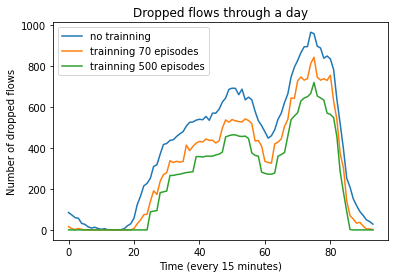

In [6]:
plt.plot(range(len(dropped_flows(df_seed8086["dropped_flows"]))), dropped_flows(df_seed8086["dropped_flows"]), label='no trainning')
plt.plot(range(len(dropped_flows(df_seed8086_train70["dropped_flows"]))), dropped_flows(df_seed8086_train70["dropped_flows"]), label='trainning 70 episodes')
plt.plot(range(len(dropped_flows(df_seed8443["dropped_flows"]))), dropped_flows(df_seed8443["dropped_flows"]), label='trainning 500 episodes')
# plt.plot(range(len(dropped_flows(df_seed9726["dropped_flows"]))), dropped_flows(df_seed9726["dropped_flows"]))


plt.title("Dropped flows through a day")
plt.xlabel("Time (every 15 minutes)")
plt.ylabel("Number of dropped flows")
plt.legend()
plt.show()

In [7]:
def pre_process_delay(data):
    return [point/10 for point in data]

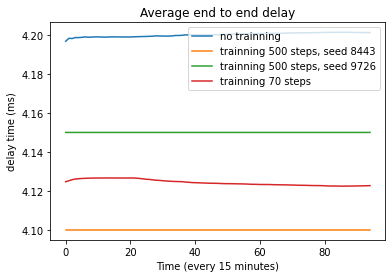

In [8]:
plt.plot(range(len(pre_process_delay(df_seed8086["avg_end2end_delay"]))), pre_process_delay(df_seed8086["avg_end2end_delay"]), label='no trainning')
plt.plot(range(len(pre_process_delay(df_seed8443["avg_end2end_delay"]))), pre_process_delay(df_seed8443["avg_end2end_delay"]), label='trainning 500 steps, seed 8443')
plt.plot(range(len(pre_process_delay(df_seed9726["avg_end2end_delay"]))), pre_process_delay(df_seed9726["avg_end2end_delay"]), label='trainning 500 steps, seed 9726')
plt.plot(range(len(pre_process_delay(df_seed8086_train70["avg_end2end_delay"]))), pre_process_delay(df_seed8086_train70["avg_end2end_delay"]), label='trainning 70 steps')

plt.title("Average end to end delay")
plt.xlabel("Time (every 15 minutes)")
plt.ylabel("delay time (ms)")
plt.legend()
plt.show()